<img src="img/TJI_logo_whitebg_440x220.jpg" alt="drawing" style="width: 220px;float: right"/>

# Analysis: Initial exploration of custodial death data
---

## Overview

A 'custodial death' aka 'death in custody' occurs when a civilian dies while incarcerated, in police custody, or while police are attempting to arrest. Texas jails, prisons, and law enforcement agencies must file a "Custodial Death Report" (CDR) for all such deaths. We have consistent data going back to 2005.

## Summary of findings
* Approximately 500 people die in custody each year in Texas.
* ~50% of those are from natural causes, 20% from homicides (usually police shootings), 20% from suicides, and 10% other.
* ~50% are inmates of state prisons, ~25% inmates of county jails, and ~25% are in police custody and have not yet been booked (e.g. those that die at the scene of arrest).
* Deaths in prison (~300/year)...
  * Tend to be by natural causes (80%) and some by suicide (10%)
  * Are typically a few years after incarceration
  * Are typically persons in their 40s and 50s
* Deaths in jail (~100/year)...
  * Tend to be by natural causes (50%), suicide (25%), and alcohol/drug intoxication (10%)
  * Are typically a few days to a few months after incarceration
* Deaths in police custody (pre-booking), ~140/year...
  * Tend to be from being shot by police (55%), suicides (15%), and alcohol/drug intoxication (10%)
  * Are typically at the scene or shortly thereafter
  * Are typically persons in their 20s and 30s
  * Note that this category of "custody" encapsulates police shootings and other deaths during arrest.
* Deaths by police shooting have steadily risen over time, from ~45 in 2005 to ~80 in 2017.
* Suicides in jail seem to happen more in isolated cells. Of all deaths that happen in single cells, 45% are from suicide (vs 20% of deaths in multiple-person cells).
* Suicides in jail and prison are overwhelmingly (90%) by hanging. Suicides in police custody are overwhelmingly (90%) by firearm.
* ~15% of officer-involved shootings where a civilian died do not have custodial death reports. That is, 25 of 164 officer-involved shootings reported via the [Peace Officer Involved Shooting Report](https://www.texasattorneygeneral.gov/cj/peace-officer-involved-shooting-report) in 2016-2017 do not have a CDR record. 3 records have the opposite pattern (in CDR but not OIS).

## Datasets used
* `tji/deaths-in-custody/cleaned_custodial_death_reports`
* `tji/officer-involved-shooting/shot_civilians`

##### Author: Everett Wetchler (everett.wetchler@gmail.com)

## [ Setup and load data ]

In [1]:
import datadotworld as dw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

%matplotlib inline

%load_ext watermark
%watermark -a 'Everett Wetchler' -g -d -t -z -w -p numpy,pandas,matplotlib,seaborn,datadotworld

Everett Wetchler 2018-05-31 09:42:42 PDT

numpy 1.14.3
pandas 0.20.1
matplotlib 2.2.0
seaborn 0.7.1
datadotworld 1.6.0
Git hash: c304f867152cb4001ae28bb830598e281928ba1e
watermark 1.5.0


Removing 25 past plots


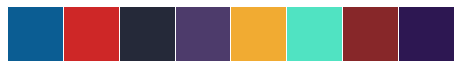

In [2]:
from lib.utils import *
from lib.style import *

sns.palplot(sns.color_palette())

plotsaver = PlotSaver('../plots/', 'cdr', numbering=False)

### [ Load data ]

In [3]:
datasets = dw.load_dataset('tji/deaths-in-custody', force_update=True)
cdr = datasets.dataframes['cleaned_custodial_death_reports']
start, end = min(cdr.death_date_and_time), max(cdr.death_date_and_time)
FMT = '%b %d, %Y'
print("First reported death is on %s -- last is on %s" % (start.strftime(FMT), end.strftime(FMT)))
cdr.head()

First reported death is on Jan 01, 2005 -- last is on Apr 23, 2018


,record_id,num_revisions,form_version,report_date,date_time_of_custody_or_incident,name_first,name_last,name_middle,name_suffix,name_full,date_of_birth,age_at_time_of_death,sex,race,death_date,death_date_and_time,death_location_county,death_location_city,death_location_street_address,death_location_latitude,death_location_longitude,death_location_census_tract,death_location_type,death_location_type_other,death_from_pre_existing_medical_condition,manner_of_death,manner_of_death_description,means_of_death,means_of_death_other,medical_cause_of_death,medical_examinor_coroner_evalution,medical_treatment,days_from_custody_to_death,who_caused_death_in_homicide_or_accident,who_caused_death_in_homicide_or_accident_other,offense_1,offense_2,offense_3,were_the_charges,facility_entry_date_time,type_of_custody,specific_type_of_custody_facility,agency_address,agency_city,agency_county,agency_name,agency_zip,entry_behavior,other_behavior,exhibit_any_medical_problems,exhibit_any_mental_health_problems,make_suicidal_statements
0,PA05001C,0.0,V_2005,2005-03-02 14:48:00,2005-01-01 15:04:00,DINO,GOMEZ,NaN,NaN,DINO GOMEZ,1964-04-03,40.0,M,HISPANIC,2005-01-01,2005-01-01 15:04:00,TARRANT,FORT WORTH,1509 W. HAMMOND,NaN,NaN,NaN,CRIME/ARREST SCENE,NaN,NOT APPLICABLE,HOMICIDE,NaN,FIREARM,NaN,GUNSHOT WOUND TO THE CHEST,"YES, RESULTS ARE AVAILABLE",NOT APPLICABLE,0.0,LAW ENFORCEMENT/CORRECTIONAL PERSONNEL,NaN,AGGRAVATED ASSAULT,NaN,NaN,NOT FILED AT TIME OF DEATH,NaN,POLICE CUSTODY (PRE-BOOKING),CUSTODY OF LAW ENFORCEMENT PERSONNEL DURING/FL...,350 W. BELKNAP,FORT WORTH,TARRANT,FORT WORTH POLICE DEPT,76102,NaN,NaN,NaN,NaN,NaN
1,PA14199CJ,0.0,V_2005,2014-04-28 09:27:00,2014-04-17 09:49:00,ALISHA,SKEATS,NaN,NaN,ALISHA SKEATS,1981-03-23,33.0,F,WHITE,2014-04-20,2014-04-20 08:14:00,DALLAS,DALLAS,PARKLAND HOSPITAL,NaN,NaN,NaN,MEDICAL FACILITY,NaN,UNKNOWN,NATURAL CAUSES/ILLNESS,COMPLICATIONS OF CHRONIC OPIATE USE,NOT APPLICABLE,NaN,"COMPLICATIONS OF CHRONIC OPIATE, BENZODIAZEPIN...","YES, RESULTS ARE AVAILABLE",YES,2.0,NOT APPLICABLE,NaN,THEFT OF SERVICE,NaN,NaN,FILED,2014-04-17 09:49:00,JAIL,HOSPITAL/INFIRMARY,133 N. RIVERFRONT BLVD.,DALLAS,DALLAS,DALLAS CO SHERIFFS OFFICE,75207,NaN,NaN,NaN,NaN,NaN
2,PA14198P,0.0,V_2005,2014-04-25 15:15:00,1998-10-06 00:00:00,ORVILLE,MCCOY,LEE,NaN,ORVILLE LEE MCCOY,1949-11-02,64.0,M,WHITE,2014-04-23,2014-04-23 09:07:00,ANDERSON,TENNESSEE COLONY,"MICHAEL UNIT, 2664 FM 2054",NaN,NaN,NaN,LAW ENFORCEMENT FACILITY,NaN,UNKNOWN,NATURAL CAUSES/ILLNESS,MALIGNANT PLEURAL EFFUSION GT BLEESING/ANEMIA,NOT APPLICABLE,NaN,ESLD-LIVER DISEASE,"NO, EVALUATION NOT PLANNED",YES,5678.0,NOT APPLICABLE,NaN,AGGRAVATED SEXUAL ASSAULT OF A CHILD,NaN,NaN,CONVICTED,1998-10-06 00:00:00,PRISON,TDCJ,"2503 LAKE ROAD, SUITE 5",HUNTSVILLE,STATE,TEXAS DEPT OF CRIMINAL JUSTICE,77340,NaN,NaN,NaN,NaN,NaN
3,PA14197P,0.0,V_2005,2014-04-25 13:25:00,2012-03-19 00:00:00,PEDRO,JUAREZ,NaN,JR,PEDRO JUAREZ JR,1960-05-11,53.0,M,HISPANIC,2014-04-16,2014-04-16 06:44:00,BOWIE,NEW BOSTON,3899 STATE HWY 98,NaN,NaN,NaN,LAW ENFORCEMENT FACILITY,NaN,UNKNOWN,NATURAL CAUSES/ILLNESS,CARDIAC ARRHYTHMIA,NOT APPLICABLE,NaN,SUDDEN UNEXPECTED DEATH IN SCHIZOPHRENIA DUE T...,"YES, RESULTS ARE AVAILABLE",NOT APPLICABLE,758.0,NOT APPLICABLE,NaN,AGGRAVATED ASSAULT,NaN,NaN,CONVICTED,2012-04-25 00:00:00,PRISON,TDCJ,"2503 LAKE ROAD, SUITE 5",HUNTSVILLE,STATE,TEXAS DEPT OF CRIMINAL JUSTICE,77340,NaN,NaN,NaN,NaN,NaN
4,PA14196P,0.0,V_2005,2014-04-25 11:14:00,2014-02-03 00:00:00,JAMES,BENJAMIN,NEAL,NaN,JAMES NEAL BENJAMIN,1969-10-03,44.0,M,BLACK,2014-04-23,2014-04-23 13:35:00,FORT BEND,RICHMON,JESTER 4 UNIT-4 JESTER RD.,NaN,NaN,NaN,MEDICAL FACILITY,NaN,UNKNOWN,NATURAL CAUSES/ILLNESS,THROMBOEMBOLISM,NOT APPLICABLE,NaN,ACUTE PULMONARY THROMBOEMBOLISM,"YES, RESULTS ARE AVAILABLE",NOT APPLICABLE,79.0,NOT APPLICABLE,NaN,FELONY THEFT ( 1YR PROBATION) SAFPF,NaN,NaN,PROBATION/PAROLE VIOLATION,2014-02-03 00:00:00,PRISON,TDCJ,"2503 LAKE ROAD, SUITE 5",HUNTSVILLE,STATE,TEXAS DEPT OF CRIMINAL JUSTICE,77340,NaN,NaN

### [ Define some variables and new columns for convenience]

In [4]:
# Define these as variables so we don't have to worry about mistyping
# them in myriad filters later.
CUSTODY_POLICE = 'POLICE CUSTODY\n(PRE-BOOKING)'
CUSTODY_JAIL = 'JAIL'
CUSTODY_PRISON = 'PRISON'
NATURAL_DEATH = 'NATURAL CAUSES/ILLNESS'

# Add a newline in this particular value so it prints nicely in charts
cdr.loc[cdr.type_of_custody == 'POLICE CUSTODY (PRE-BOOKING)', 'type_of_custody'] = CUSTODY_POLICE

# Add some extra columns for convenience
cdr['death_year'] = cdr.death_date_and_time.dt.year
cdr['suicide'] = cdr.manner_of_death == 'SUICIDE'
cdr['natural_death'] = cdr.manner_of_death == NATURAL_DEATH

# Filtered dataframes for convenience
police = cdr[cdr.type_of_custody == CUSTODY_POLICE]
jail = cdr[cdr.type_of_custody == CUSTODY_JAIL]
prison = cdr[cdr.type_of_custody == CUSTODY_PRISON]

# For year-over-year analyses, we ignore 2005 and 2018 data as they may not be full years
cdr_fullyears = cdr[(cdr.death_year > 2005) & (cdr.death_year < 2018)]

### [ Graphical helper functions ]

In [5]:
def yearly_plot(df, cat_var, kind='line', title=None):
    '''Plot CDR data, broken down by a particular column, over all years.'''
    fig, ax = plt.subplots(1)
    frame = df.groupby([cat_var, 'death_year']).size().unstack().T
    frame.sort_values(frame.index[-1], axis=1, inplace=True, ascending=False)
    palette = sns.color_palette()
    if frame.shape[1] > len(palette):
        palette = sns.color_palette('Spectral', frame.shape[1], desat=0.8)
    frame.fillna(0).plot(kind='line', ax=ax, color=palette)
    ax.set_title(title or 'Custodial deaths by %s, over time' % cat_var.replace('_', ' '))
    ax.legend(bbox_to_anchor=(1.0,1.0), loc='upper left', title='')
    ax.set_xticks(np.arange(df.death_year.min(), 2018, 1))
    shortyear_xticks(ax)
    ax.set_ylim(0, ax.get_ylim()[1])
    ax.set_xlabel('')
    return fig, ax

In [6]:
def alter_first_last_bar(ax, alpha=0.5, hatch='//', hatchalpha=0.2):
    '''Change the look of the last bar in a bar chart to indicate incomplete data.'''
    bars = [c for c in ax.get_children() if isinstance(c, mpl.patches.Rectangle)]
    xmin = min(b.xy[0] for b in bars)
    xmax = max(b.xy[0] for b in bars)
    for b in bars:
        if b.xy[0] in (xmin, xmax):
            b.set_hatch(hatch)
            b.set_edgecolor((1, 1, 1) + (hatchalpha,))
            b.set_facecolor(b.get_facecolor()[:3] + (alpha,))

## [ Quick summary of CDRs over time and form versions ]

Saving plot to ../plots/cdr_explore_year_totals.png


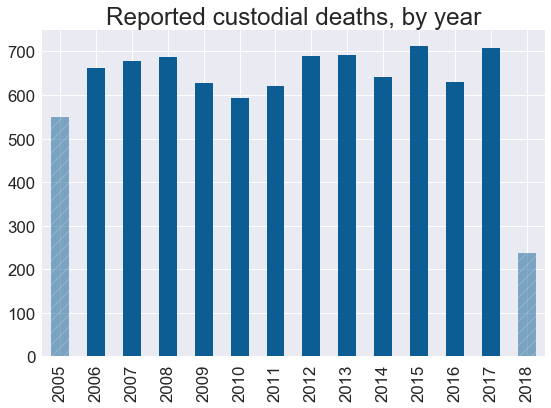

In [7]:
fig, ax = plt.subplots(1)
cdr.death_date_and_time.dt.year.value_counts().sort_index().plot(kind='bar', ax=ax, color=TJI_BLUE)
alter_first_last_bar(ax)
ax.set_title('Reported custodial deaths, by year')
plotsaver.saveplot(fig, 'year_totals')

Saving plot to ../plots/cdr_explore_year_totals_by_form_version.png


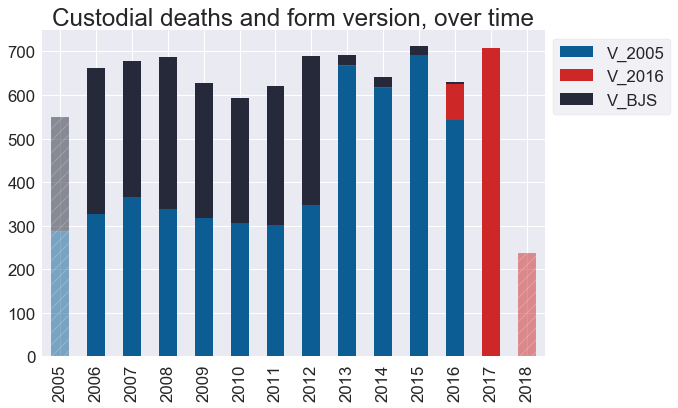

In [8]:
fig, ax = plt.subplots(1)
frame = cdr.groupby(['form_version', 'death_year']).size().unstack().T
frame.plot(kind='bar', ax=ax, stacked=True)
ax.set_title('Custodial deaths and form version, over time')
ax.set_xlabel('')
ax.legend(bbox_to_anchor=(1.0,1.0), loc='upper left', title='')
alter_first_last_bar(ax)
plotsaver.saveplot(fig, 'year_totals_by_form_version')

Saving plot to ../plots/cdr_explore_year_totals_by_type_of_custody.png


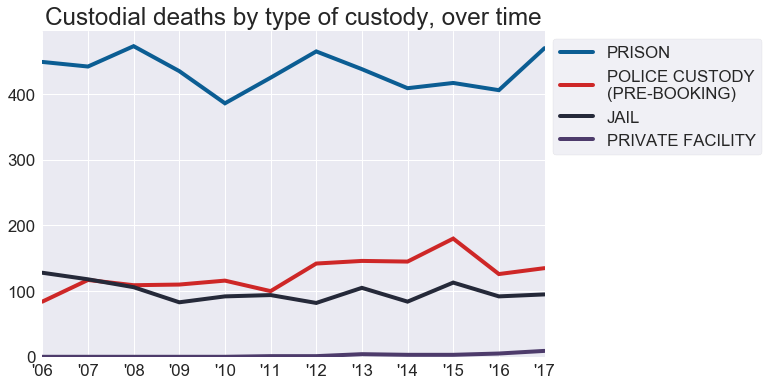

In [9]:
fig, ax = yearly_plot(cdr_fullyears, 'type_of_custody')
plotsaver.saveplot(fig, 'year_totals_by_type_of_custody')

## [ Manner of death by type of custody ]

In [8]:
frame = cdr.groupby(['manner_of_death', 'type_of_custody']).size().unstack()
frame.drop('PRIVATE FACILITY', axis=1, inplace=True)
frame = frame.loc[['SUICIDE'] + [i for i in frame.index if i != 'SUICIDE']]

combine = ['OTHER, SPECIFY', 'ACCIDENTAL', 'ALCOHOL/DRUG INTOXICATION']
frame.loc['OTHER'] = frame.loc[combine, :].sum()
frame = frame.drop(combine, axis=0)
frame.index = [i.split()[0] for i in frame.index]
frame = frame.loc[:, ::-1]
frame

type_of_custody,PRISON,POLICE CUSTODY (PRE-BOOKING),JAIL
SUICIDE,380,231,339
HOMICIDE,58,992,33
NATURAL,5112,52,692
OTHER,191,367,252


Saving plot to ../plots/cdr_manner_and_custody_type_donut.png


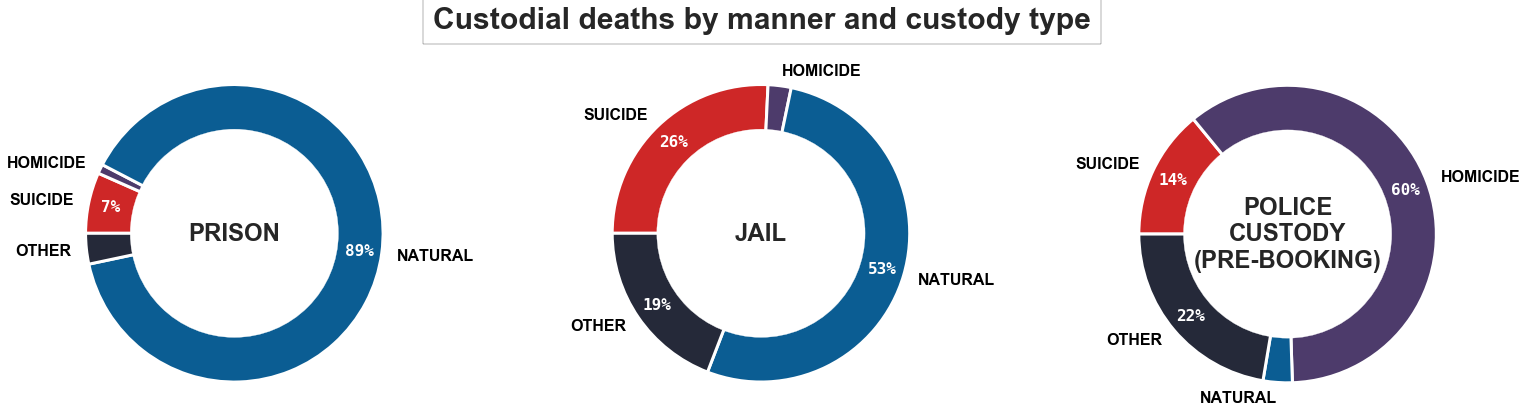

In [10]:
frame = frame[['PRISON', 'JAIL', 'POLICE CUSTODY\n(PRE-BOOKING)']]
fig, ax = pie_plot(frame, donut=True, figsize=(24, 6),
                   label_size=16, title='Custodial deaths by manner and custody type',
                   min_pct_for_label=4,
                   colors=[TJI_RED, TJI_PURPLE, TJI_BLUE, TJI_DEEPBLUE])
plt.subplots_adjust(wspace=.6)
plotsaver.saveplot(fig, 'manner_and_custody_type_donut', dpi=300)

## [ Time in custody ]

Saving plot to ../plots/cdr_explore_time_in_custody_by_type_of_custody.png


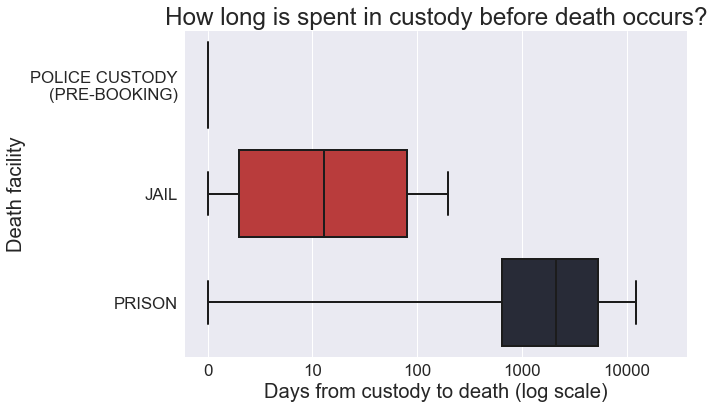

In [14]:
frame = cdr[(cdr.days_from_custody_to_death >= 0) & (cdr.type_of_custody != 'PRIVATE FACILITY')].copy()
frame['days_from_custody_to_death'] = frame['days_from_custody_to_death'] + 1

fig, ax = plt.subplots(1)
sns.boxplot(y='type_of_custody', x='days_from_custody_to_death', data=frame, orient='h', fliersize=0, ax=ax, linewidth=2)
ax.set_xscale('log')
ax.set_xticklabels([int(t) if t > 1 else '0' for t in ax.get_xticks()])
ax.set_xlabel('Days from custody to death (log scale)')
ax.set_ylabel('Death facility')
ax.set_title('How long is spent in custody before death occurs?')
plotsaver.saveplot(fig, 'time_in_custody_by_type_of_custody')

## [ Examine natural and non-natural deaths ]

Saving plot to ../plots/cdr_explore_time_in_custody_by_natural_vs_unnatural_death.png


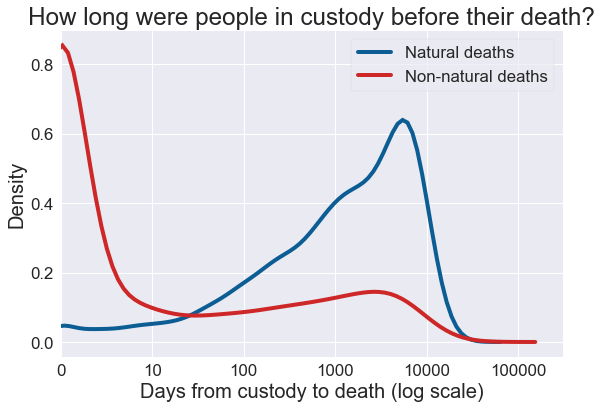

In [15]:
fig, ax = plt.subplots(1)
a = cdr[cdr.natural_death].days_from_custody_to_death.dropna()
b = cdr[~cdr.natural_death].days_from_custody_to_death.dropna()
func = lambda x: np.log10(x + 1)
sns.kdeplot(a.apply(func), ax=ax, label='Natural deaths')
sns.kdeplot(b.apply(func), ax=ax, label='Non-natural deaths')
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_xticklabels([int(np.round(10 ** x)) if x > 0 else 0 for x in ax.get_xticks()])
ax.set_xlabel("Days from custody to death (log scale)")
ax.set_ylabel('Density')
ax.set_title("How long were people in custody before their death?")
plotsaver.saveplot(fig, 'time_in_custody_by_natural_vs_unnatural_death')
pass

Saving plot to ../plots/cdr_explore_year_totals_natural_vs_notnatural.png


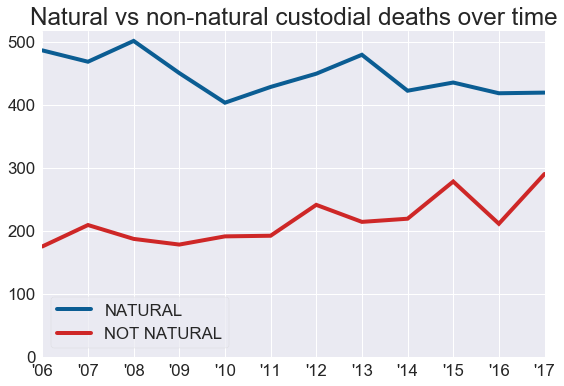

In [16]:
fig, ax = plt.subplots(1)
cdr_fullyears[cdr_fullyears.natural_death].death_year.value_counts().sort_index().plot(ax=ax, label='NATURAL')
cdr_fullyears[~cdr_fullyears.natural_death].death_year.value_counts().sort_index().plot(ax=ax, label='NOT NATURAL')
ax.set_title('Natural vs non-natural custodial deaths over time')
ax.set_xticks(np.arange(cdr_fullyears.death_year.min(), 2018, 1))
ax.set_ylim(0, ax.get_ylim()[1])
ax.legend()
shortyear_xticks(ax)
plotsaver.saveplot(fig, 'year_totals_natural_vs_notnatural')
pass

In [17]:
notnatural = cdr_fullyears[~cdr_fullyears.natural_death]

Saving plot to ../plots/cdr_explore_year_totals_nonnatural_by_death_location.png


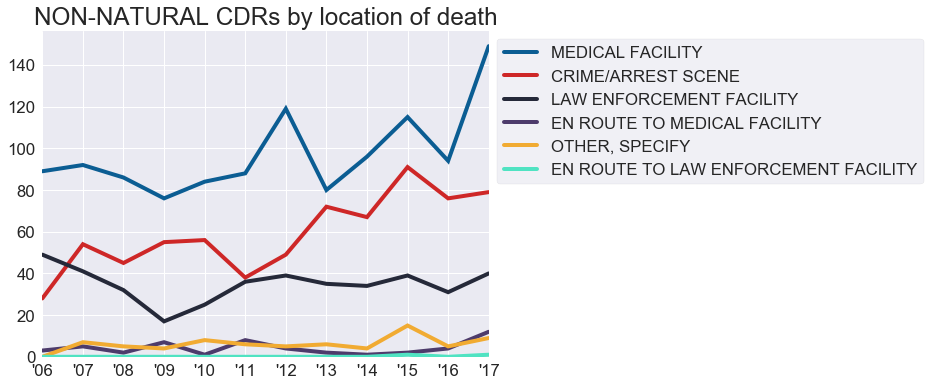

In [18]:
fig, ax = yearly_plot(notnatural, 'death_location_type',
                      title='NON-NATURAL CDRs by location of death')
fig.set_size_inches(8, 6)
ax.legend(title='', bbox_to_anchor=(1.0, 1.0))
plotsaver.saveplot(fig, 'year_totals_nonnatural_by_death_location')

Saving plot to ../plots/cdr_explore_year_totals_nonnatural_by_manner_of_death.png


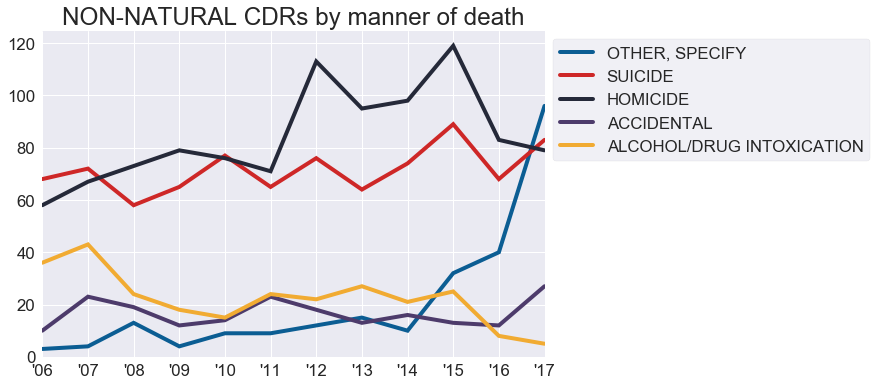

In [19]:
fig, ax = yearly_plot(notnatural, 'manner_of_death',
                      title='NON-NATURAL CDRs by manner of death')
plotsaver.saveplot(fig, 'year_totals_nonnatural_by_manner_of_death')

Saving plot to ../plots/cdr_explore_year_totals_nonnatural_by_means_of_death.png


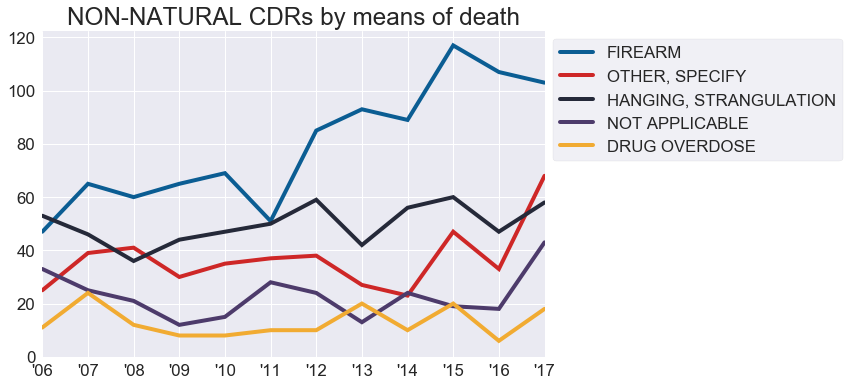

In [20]:
fig, ax = yearly_plot(notnatural, 'means_of_death',
                      title='NON-NATURAL CDRs by means of death')
plotsaver.saveplot(fig, 'year_totals_nonnatural_by_means_of_death')

Saving plot to ../plots/cdr_explore_year_totals_nonnatural_by_type_of_custody.png


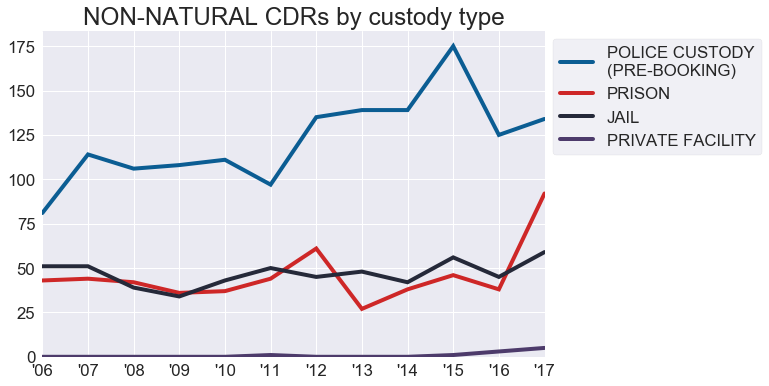

In [21]:
fig, ax = yearly_plot(notnatural, 'type_of_custody',
                      title='NON-NATURAL CDRs by custody type')
plotsaver.saveplot(fig, 'year_totals_nonnatural_by_type_of_custody')

## [ What's driving the upward trend in police-custody deaths (blue line above)?]
A: Officer-involved shootings, it seems

Saving plot to ../plots/cdr_explore_year_totals_nonnatural_police_by_manner_of_death.png


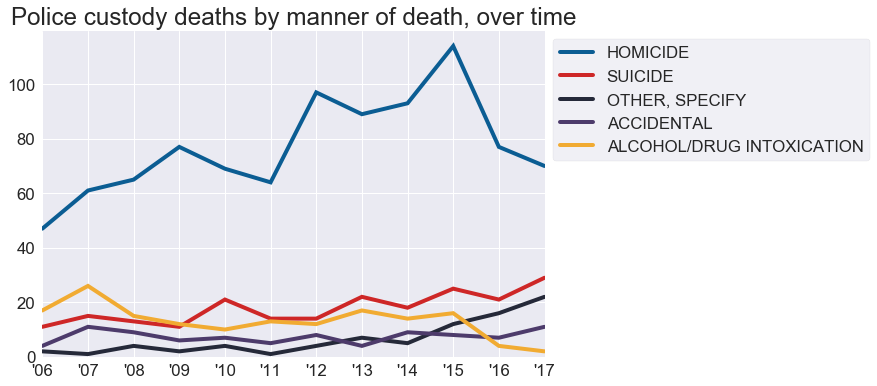

In [22]:
frame = notnatural[notnatural.type_of_custody == 'POLICE CUSTODY\n(PRE-BOOKING)']
fig, ax = yearly_plot(frame, 'manner_of_death', title='Police custody deaths by manner of death, over time')
plotsaver.saveplot(fig, 'year_totals_nonnatural_police_by_manner_of_death')

Saving plot to ../plots/cdr_explore_year_totals_police_homocide_by_causer.png


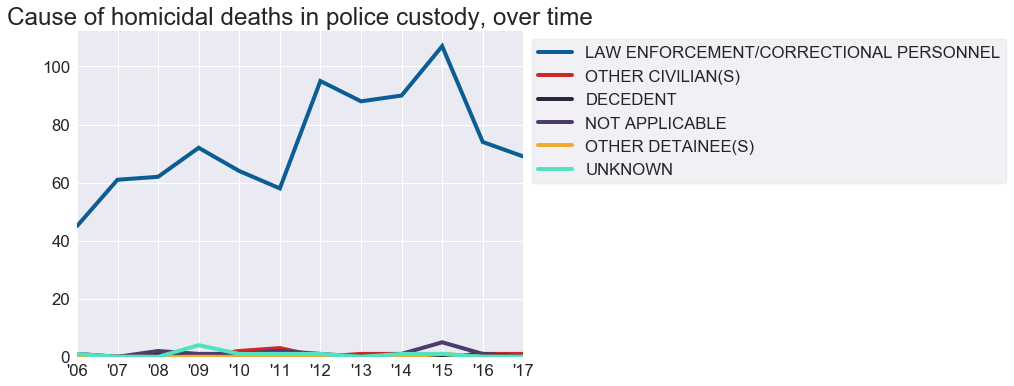

In [23]:
frame = frame[frame.manner_of_death == 'HOMICIDE']
fig, ax = yearly_plot(frame, 'who_caused_death_in_homicide_or_accident', title='Cause of homicidal deaths in police custody, over time')
fig.set_size_inches(8, 6)
ax.legend(title='', bbox_to_anchor=(1.0, 1.0))
plotsaver.saveplot(fig, 'year_totals_police_homocide_by_causer')

Saving plot to ../plots/cdr_explore_year_totals_police_homocide_means.png


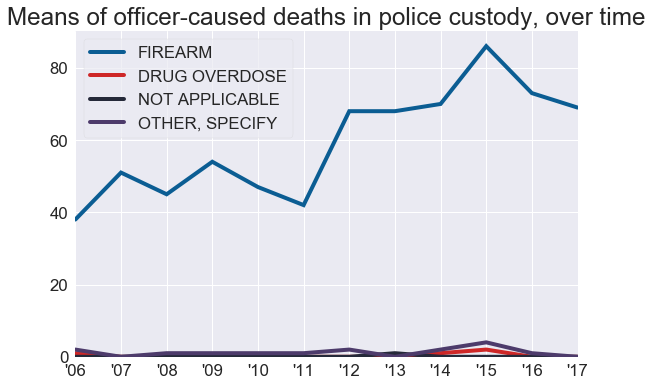

In [24]:
frame = frame[frame.who_caused_death_in_homicide_or_accident == 'LAW ENFORCEMENT/CORRECTIONAL PERSONNEL']
fig, ax = yearly_plot(frame, 'means_of_death', title='Means of officer-caused deaths in police custody, over time')
ax.legend(loc='upper left')
plotsaver.saveplot(fig, 'year_totals_police_homocide_means')

## [ What's driving the up-tick in non-natural prison deaths in 2017? (see below) ]

A: Oddly, it seems to be an uptick in deaths that are "pending autopsy results." Not sure what to do with this.

Saving plot to ../plots/cdr_explore_year_totals_nonnatural_prison_manner_of_death.png


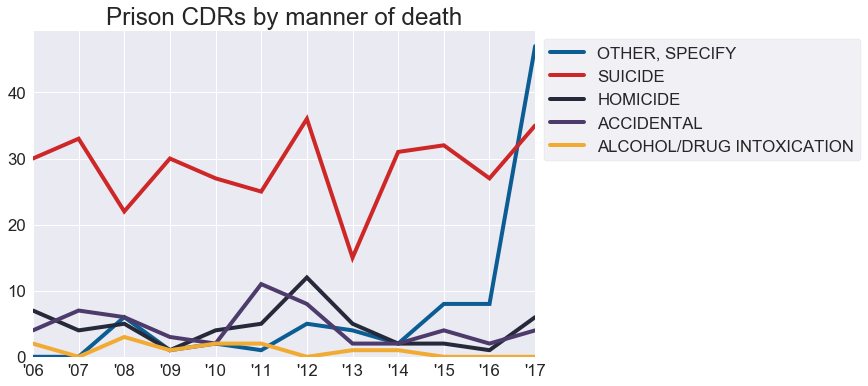

In [25]:
frame = notnatural[notnatural.type_of_custody == 'PRISON']
fig, ax = yearly_plot(frame, 'manner_of_death', title='Prison CDRs by manner of death')
plotsaver.saveplot(fig, 'year_totals_nonnatural_prison_manner_of_death')

In [26]:
frame = notnatural[notnatural.type_of_custody == 'PRISON']
frame = frame[frame.manner_of_death == 'OTHER, SPECIFY']
frame = pd.crosstab(frame.manner_of_death_description, frame.death_year)
frame['TOTAL'] = frame.sum(axis=1)
frame.sort_values(['TOTAL'], ascending=False).head()

death_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,TOTAL
manner_of_death_description,,,,,,,,,,,
PENDING AUTOPSY RESULTS,0,0,0,0,0,0,0,0,2,47,49
MOTOR VEHICLE ACCIDENT,0,0,0,0,0,0,0,7,0,0,7
UNDETERMINED,0,0,0,1,2,0,1,1,0,0,5
ACCIDENT,0,0,0,0,0,2,1,0,0,0,3
NOT DETERMINED,0,0,0,0,1,0,0,0,0,0,1


## [ Age of decedents ]

Saving plot to ../plots/cdr_explore_age_by_natural.png


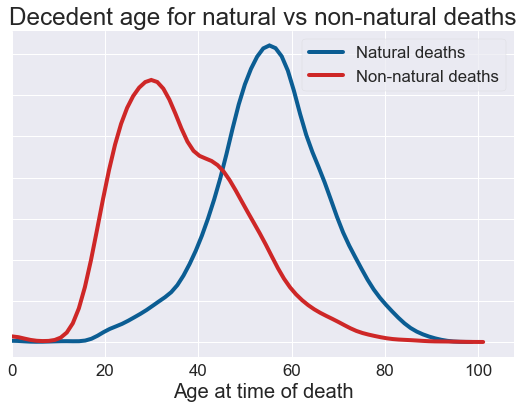

In [27]:
fig, ax = plt.subplots(1)
a = cdr[cdr.natural_death].age_at_time_of_death.dropna()
b = cdr[~cdr.natural_death].age_at_time_of_death.dropna()
sns.kdeplot(a, ax=ax, label='Natural deaths')
sns.kdeplot(b, ax=ax, label='Non-natural deaths')
ax.set_xlabel("Age at time of death")
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_yticklabels('')
ax.set_title("Decedent age for natural vs non-natural deaths")
plotsaver.saveplot(fig, 'age_by_natural')
pass

Saving plot to ../plots/cdr_explore_age_by_type_of_custody.png


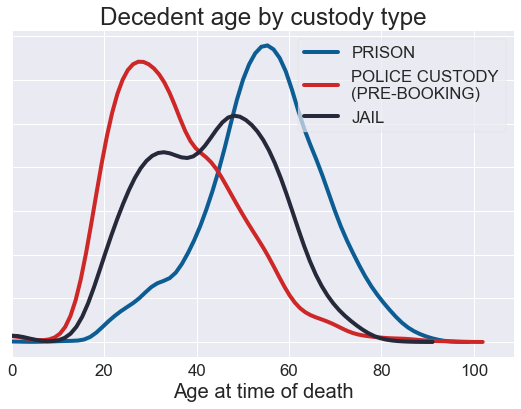

In [28]:
fig, ax = plt.subplots(1)
for custody_type in list(cdr.type_of_custody.value_counts().index):
    if custody_type == 'PRIVATE FACILITY':
        continue
    frame = cdr[cdr.type_of_custody == custody_type]
    sns.kdeplot(frame.age_at_time_of_death.dropna(), label=custody_type)

ax.set_xlabel("Age at time of death")
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_yticklabels('')
ax.set_title("Decedent age by custody type")
ax.legend(loc='upper right')
plotsaver.saveplot(fig, 'age_by_type_of_custody')
pass

## [ Suicides ]

Saving plot to ../plots/cdr_explore_year_totals_suicide.png


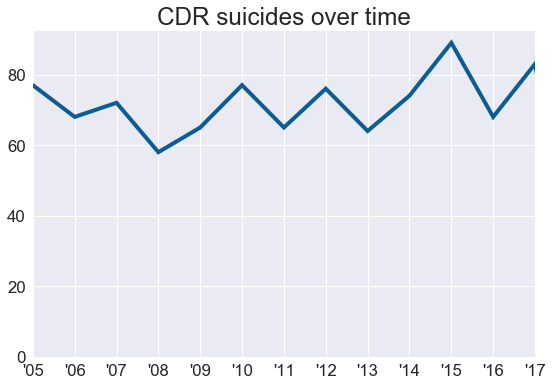

In [29]:
suicides = cdr[cdr.suicide]

fig, ax = plt.subplots(1)
suicides.death_year.value_counts().sort_index().plot(kind='line', title='CDR suicides over time', ax=ax)
ax.set_ylim(0, ax.get_ylim()[1])
ax.set_xticks(np.arange(ax.get_xticks()[0], ax.get_xticks()[-1] + 1))
ax.set_xlim(suicides.death_year.min(), 2017)
shortyear_xticks(ax)
plotsaver.saveplot(fig, 'year_totals_suicide')
pass

Saving plot to ../plots/cdr_explore_year_totals_suicide_by_type_of_custody.png


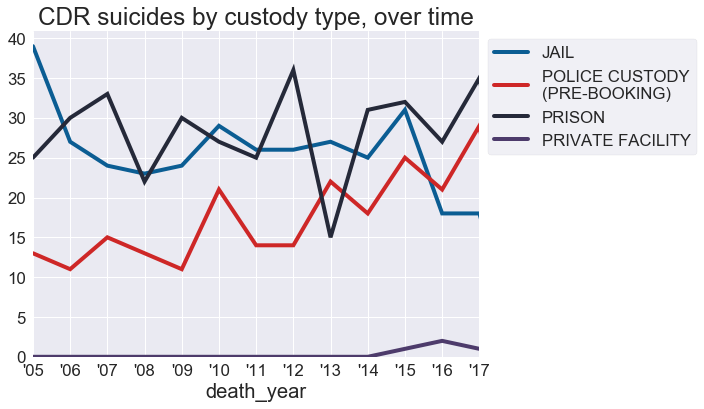

In [30]:
fig, ax = plt.subplots(1)
pd.crosstab(suicides.death_year, suicides.type_of_custody).plot(title='CDR suicides by custody type, over time', ax=ax)
ax.set_ylim(0, ax.get_ylim()[1])
ax.set_xticks(np.arange(ax.get_xticks()[0], ax.get_xticks()[-1] + 1))
ax.set_xlim(suicides.death_year.min(), 2017)
fig.set_size_inches(8, 6)
ax.legend(title='', bbox_to_anchor=(1.0, 1.0), loc='upper left')
shortyear_xticks(ax)
plotsaver.saveplot(fig, 'year_totals_suicide_by_type_of_custody')
pass

Saving plot to ../plots/cdr_explore_suicide_rate_by_type_of_custody.png


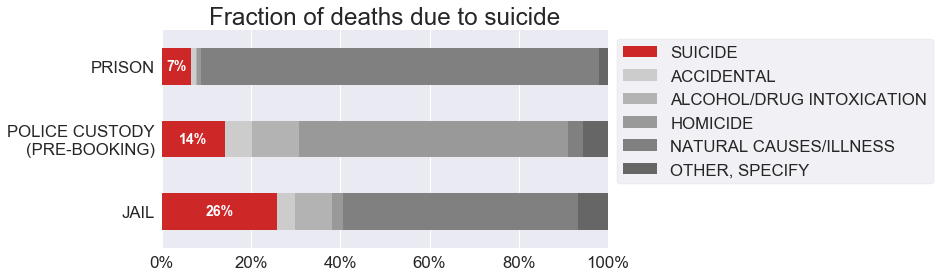

In [31]:
frame = cdr.groupby(['manner_of_death', 'type_of_custody']).size().unstack()
frame.drop('PRIVATE FACILITY', axis=1, inplace=True)
frame = frame.div(frame.sum()).T
frame = frame[['SUICIDE'] + [c for c in frame.columns if c != 'SUICIDE']]

fig, ax = plt.subplots(1)
fig.set_size_inches(8, 4)
frame.plot(kind='barh', stacked=True, ax=ax, color=[TJI_RED, [.8]*3, [.7]*3, [.6]*3, [.5]*3, [.4]*3])
percentify_x(ax)
ax.set_title('Fraction of deaths due to suicide')
ax.legend(loc='upper center')
ax.set_ylabel('')
ax.set_xlim(0, 1)
ax.legend(title='', bbox_to_anchor=(1.0, 1.0))

i = 0
for k, v in frame['SUICIDE'].items():
    ax.text(v/2, i, '%.0f%%' % (v * 100),
            verticalalignment='center', color='white',
            fontweight='bold', horizontalalignment='center')
    i += 1


plotsaver.saveplot(fig, 'suicide_rate_by_type_of_custody')

Saving plot to ../plots/cdr_jail_deaths_by_means_and_cell_type.png


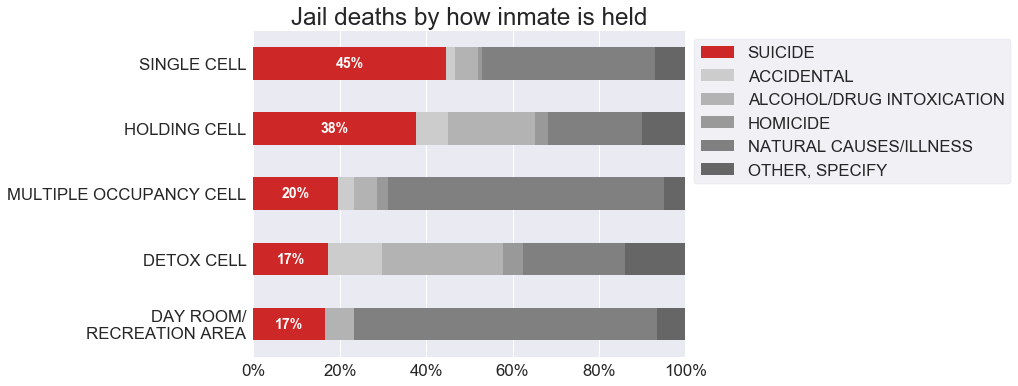

In [20]:
suicides_jail = jail[jail.suicide]
frame = pd.crosstab(jail.manner_of_death, jail.specific_type_of_custody_facility).T
frame = frame.loc[[i for i in frame.index if i.startswith('JAIL')]]
frame.index = [x.split(' - ')[1].replace('/', '/\n') for x in frame.index]
frame = frame.div(frame.sum(axis=1), axis=0)
frame = frame[['SUICIDE'] + [c for c in frame.columns if c != 'SUICIDE']]
frame.sort_values('SUICIDE', inplace=True)

fig, ax = plt.subplots(1)
frame.plot(kind='barh', stacked=True, ax=ax, color=[TJI_RED, [.8]*3, [.7]*3, [.6]*3, [.5]*3, [.4]*3])
fig.set_size_inches(15, 6)
ax.legend(title='', bbox_to_anchor=(1.0, 1.0))
ax.set_title('Jail deaths by how inmate is held')
percentify_x(ax)
ax.set_xlim(0, 1)

i = 0
for k, v in frame['SUICIDE'].items():
    ax.text(v/2, i, '%.0f%%' % (v * 100),
            verticalalignment='center', color='white',
            fontweight='bold', horizontalalignment='center')
    i += 1

plt.subplots_adjust(left=0.25, right=0.65)
plotsaver.saveplot(fig, 'jail_deaths_by_means_and_cell_type', dpi=300)

## [ An alternative view ]

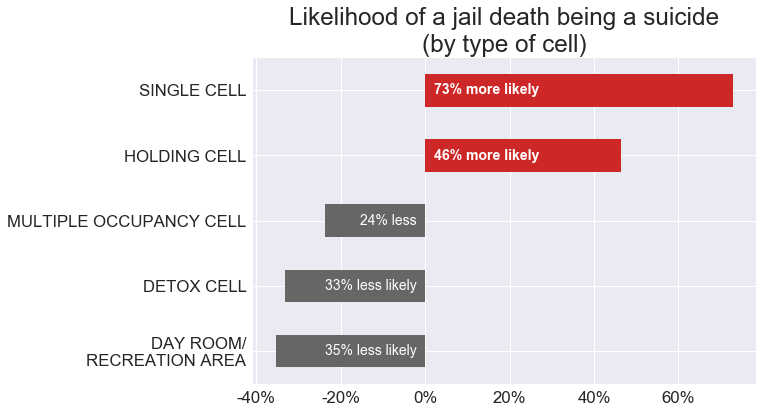

In [34]:
suicides_jail = jail[jail.suicide]
pd.crosstab(jail.manner_of_death, jail.specific_type_of_custody_facility).T

a = jail.specific_type_of_custody_facility.value_counts()
b = suicides_jail.specific_type_of_custody_facility.value_counts()
a_frac = a / a.sum()
b_frac = b / b.sum()
frame = pd.DataFrame([a, a_frac, b, b_frac, b_frac / a_frac - 1], index=[
    'All Deaths', 'Frac All Deaths', 'Suicides', 'Frac All Suicides', 'Relative']).T
frame = frame[frame['All Deaths'] > 20]
frame.sort_values('All Deaths', ascending=False, inplace=True)
frame.drop('HOSPITAL/INFIRMARY', axis=0, inplace=True)
frame.index = [x.split(' - ')[1].replace('/', '/\n') for x in frame.index]
frame.sort_values('Relative', inplace=True)

fig, ax = plt.subplots(1)
frame['Relative'].plot(kind='barh', ax=ax, color=[TJI_RED if x > 0 else [.4]*3 for x in frame['Relative']])

for i, value in enumerate(frame.Relative):
    absval = "%.0f%%" % abs(value * 100)
    label = ("%s less likely" % absval) if value < 0 else ("%s more likely" % absval)
    if abs(value) < .30:
        label = label.split(' likely')[0]
    align = 'left' if value > 0 else 'right'
    weight = 'bold' if value > 0 else None
    x = .02 if value > 0 else -.02
    ax.text(x, i, label, fontweight=weight,
            horizontalalignment=align, verticalalignment='center', color='white')

ax.set_title("Likelihood of a jail death being a suicide\n(by type of cell)")
percentify_x(ax)
plotsaver.saveplot(fig, 'jail_suicides_likelihood_by_cell_type')

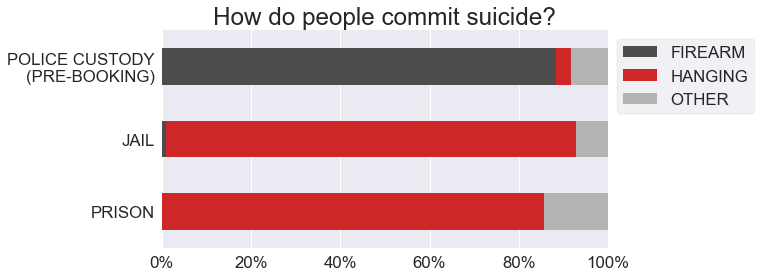

In [35]:
frame = cdr[cdr.suicide]
frame = pd.crosstab(frame.means_of_death, frame.type_of_custody).T
frame.drop('PRIVATE FACILITY', inplace=True)
frame = frame.div(frame.sum(axis=1), axis=0)
frame['OTHER, SPECIFY'] += frame['DRUG OVERDOSE']
frame.drop('DRUG OVERDOSE', axis=1, inplace=True)
frame.columns = [c.split(',')[0] for c in frame.columns]

fig, ax = plt.subplots(1)
fig.set_size_inches(8, 4)
frame = frame.loc[[CUSTODY_PRISON, CUSTODY_JAIL, CUSTODY_POLICE]]
frame.plot(kind='barh', stacked=True, ax=ax, color=[[.3]*3, TJI_RED, [.7]*3])
ax.legend(title='', bbox_to_anchor=(1.0, 1.0))
ax.set_title('How do people commit suicide?')
percentify_x(ax)
ax.set_ylabel('')
ax.set_xlim(0, 1)
plotsaver.saveplot(fig, 'suicides_by_manner')

## [ Are all officer-involved shooting deaths reported via CDR? ]
* Custodial Death Reports are distinct from Peace Officer Involved Shooting Reports (separate forms, required by separate statutes), though any civilians who die via an officer-involved shooting should be captured by both.

In [36]:
datasets = dw.load_dataset('tji/officer-involved-shootings', force_update=True)
datasets.dataframes
shot_civilians = datasets.dataframes['shot_civilians']
ois_civilian_deaths = shot_civilians[shot_civilians['civilian_died']]
ois_civilian_deaths = ois_civilian_deaths[
    (ois_civilian_deaths.date_incident.dt.year <= 2017) & (ois_civilian_deaths.date_incident.dt.year >= 2016)]

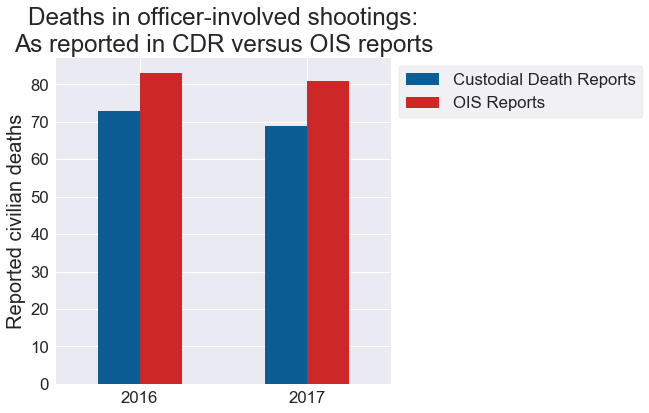

In [37]:
cdr_ois = cdr[
    (cdr.manner_of_death == 'HOMICIDE') &
    (cdr.type_of_custody == CUSTODY_POLICE) &
    (cdr.who_caused_death_in_homicide_or_accident == 'LAW ENFORCEMENT/CORRECTIONAL PERSONNEL') &
    (cdr.means_of_death == 'FIREARM')]
cdr_ois = cdr_ois[(cdr_ois.death_year <= 2017) & (cdr_ois.death_year >= 2016)]

a = cdr_ois.death_year.value_counts()
a.name = 'Custodial Death Reports'
b = ois_civilian_deaths.date_incident.dt.year.value_counts()
b.name = 'OIS Reports'
frame = pd.concat([a, b], axis=1)

fig, ax = plt.subplots(1)
frame.plot(kind='bar', title='Deaths in officer-involved shootings:\nAs reported in CDR versus OIS reports', ax=ax)
fig.set_size_inches(6, 6)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticks(np.arange(0, ax.get_ylim()[1], 10))
ax.set_ylabel('Reported civilian deaths')
pass

## [ Let's try to pair shooting deaths 1-1 between the datasets ]

In [38]:
ois_names = ois_civilian_deaths['civilian_name_full']
cdr_names = cdr_ois['name_full']

In [39]:
a = ois_names.value_counts()
a.name = 'ois'
b = cdr_names.value_counts()
b.name = 'cdr'
df = pd.concat([a, b], axis=1).fillna(0).astype(int)
df[df.cdr != df.ois].head(10)

,ois,cdr
ALTON ANTHONY FOLMAR,1,0
ALTON ANTHONY FOLMAR JR,0,1
ALVA BRAZIEL,1,0
ALVA BURNETT BRAZIEL MR.,0,1
ALVA JOE GWINN,1,0
ANDREW BICE,1,0
ANTHONY BERTONI,1,0
ANTHONY JAMES BERTONI,0,1
ANTONIO GERARDO RODRIGUEZ,1,0
ANTROINE JERRAL SCOTT,0,1


#### The below was done by hand, unfortuantely (May 2018). Sometimes one dataset records a middle name and the other doesn't, sometimes they spell a name slightly differently, etc. This can probably be done with reasonable accuracy via programmatic means, but it's a short enough list to attempt manually for now.

In [40]:
ois_only = 'ALVA JOE GWINN, ANTONIO GERARDO RODRIGUEZ, BALTAZAR SILVA-RAMOS, CHESTER RANDOLPH WARD, DARREL MACHEMEHL, DERICK LAMONT BROWN, ELEUTERIO AMAYA-TORRES, EMMETT EDWARD HALL, GARY DON LAFON, GARY WAYNE JONES, GREGORY HAMM, JAKE CHILDERS, JASON MEADOR, JASON SEBASTIAN ROQUE, JEFREY GRAY WISE, JOEL FABELA, JOSE MACEDO, LANDON DEON NOBLES, LYLE PATRICK BLANCHARD, MANUEL VILLEGAS, MARTIN GOMEZ, MATTHEW GAMBARO, MICAH XAVIER JOHNSON, MICHAEL DIAZ-GARCIA, TERRY WAYNE FOSTER'.split(', ')
cdr_only = 'CLAUDIA ABIGAIL GARCIA-MIRANDA, DANNIE LEE WHITMORE, ED R MCIVER SR'.split(', ')
cdr_duplicates = 'DALE MAURICE HIGHTOWER JR., FERNANDO HERNANDEZ, JAMIE ALLEN STOTTS, RICHARD JEREMIAH RAMIREZ'.split(', ')

In [41]:
print("Found %d ois records only in the OIS dataset (%.0f%%)" % (
    len(ois_only), len(ois_only) * 100 / len(ois_civilian_deaths)))
print("Found %d ois records only in the CDR dataset (%.0f%%)" % (
    len(cdr_only), len(cdr_only) * 100 / len(cdr_ois)))
print("Found %d duplicate ois records the CDR dataset (%.0f%%)" % (
    len(cdr_duplicates), len(cdr_duplicates) * 100 / len(cdr_ois)))

Found 25 ois records only in the OIS dataset (15%)
Found 3 ois records only in the CDR dataset (2%)
Found 4 duplicate ois records the CDR dataset (3%)


In [42]:
ois_only

['ALVA JOE GWINN',
 'ANTONIO GERARDO RODRIGUEZ',
 'BALTAZAR SILVA-RAMOS',
 'CHESTER RANDOLPH WARD',
 'DARREL MACHEMEHL',
 'DERICK LAMONT BROWN',
 'ELEUTERIO AMAYA-TORRES',
 'EMMETT EDWARD HALL',
 'GARY DON LAFON',
 'GARY WAYNE JONES',
 'GREGORY HAMM',
 'JAKE CHILDERS',
 'JASON MEADOR',
 'JASON SEBASTIAN ROQUE',
 'JEFREY GRAY WISE',
 'JOEL FABELA',
 'JOSE MACEDO',
 'LANDON DEON NOBLES',
 'LYLE PATRICK BLANCHARD',
 'MANUEL VILLEGAS',
 'MARTIN GOMEZ',
 'MATTHEW GAMBARO',
 'MICAH XAVIER JOHNSON',
 'MICHAEL DIAZ-GARCIA',
 'TERRY WAYNE FOSTER']

In [43]:
cdr_only

['CLAUDIA ABIGAIL GARCIA-MIRANDA', 'DANNIE LEE WHITMORE', 'ED R MCIVER SR']

In [44]:
cdr_duplicates

['DALE MAURICE HIGHTOWER JR.',
 'FERNANDO HERNANDEZ',
 'JAMIE ALLEN STOTTS',
 'RICHARD JEREMIAH RAMIREZ']